In [3]:
import os
import pandas as pd

# List of stock indices and their respective filenames
bse_indices = {
    'Auto_BSE': 'Auto_BSE.csv',
    'Bankex_BSE': 'Bankex__BSE.csv',
    'Consumer_Durables': 'Consumer Durables.csv',
    'Consumer Goods': 'Consumer Goods_BSE.csv',
    'FMCG_BSE': 'FMCG_BSE.csv',
    'IT_BSE': 'IT_BSE.csv',
    'Metals_BSE': 'Metals_BSE.csv',
    'Oil & Gas_BSE': 'Oil & Gas_BSE.csv',
    'Power_BSE': 'Power_BSE.csv',
    'Realty_BSE': 'Realty_BSE.csv',
}

# Create an empty DataFrame to hold combined data
combined_data = pd.DataFrame()

# Process each stock file and combine the closing prices
for index_name, file_name in bse_indices.items():
    if os.path.exists(file_name):
        try:
            # Load the CSV file
            df = pd.read_csv(file_name, usecols=['Date', 'Close'])
            
            # Rename the 'Close' column to the stock index name
            df.rename(columns={'Close': index_name}, inplace=True)
            
            # Merge with combined_data on 'Date'
            if combined_data.empty:
                combined_data = df  # Initialize with the first DataFrame
            else:
                combined_data = pd.merge(combined_data, df, on='Date', how='outer')
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
    else:
        print(f"File not found: {file_name}")

# Sort the combined data by 'Date'
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.sort_values(by='Date', inplace=True)

# Save the combined data to a new CSV file
output_file = 'combined_closing_prices.csv'
combined_data.to_csv(output_file, index=False)

print(f"Combined closing prices saved to '{output_file}'.")


Error processing IT_BSE.csv: No columns to parse from file
Combined closing prices saved to 'combined_closing_prices.csv'.


In [5]:
import pandas as pd
from scipy.stats import jarque_bera
from tabulate import tabulate

# Load the combined closing price data
combined_data = pd.read_csv('combined_closing_prices.csv', parse_dates=['Date'])

# Calculate daily returns
returns = combined_data.set_index('Date').pct_change() * 100  # Convert to percentage returns

# Function to calculate descriptive statistics
def descriptive_statistics(series):
    jb_stat, jb_pvalue = jarque_bera(series.dropna())  # Drop NaN for valid computation
    return {
        'Mean': series.mean(),
        'Median': series.median(),
        'Std. Dev.': series.std(),
        'Skewness': series.skew(),
        'Kurtosis': series.kurtosis(),
        'Jar-Bera': jb_stat,
        'Prob': jb_pvalue
    }

# Create a dictionary to store statistics for each index
statistics = {}

# Calculate statistics for each column (index)
for index_name in returns.columns:
    statistics[index_name] = descriptive_statistics(returns[index_name])

# Convert statistics dictionary to a DataFrame
stats_df = pd.DataFrame(statistics).T

# Reorder the columns to match Table 1's layout
stats_df = stats_df[['Mean', 'Median', 'Std. Dev.', 'Skewness', 'Kurtosis', 'Jar-Bera', 'Prob']]

# Format the table using tabulate for nice display
table = tabulate(
    stats_df.reset_index(),
    headers=["Index", "Mean", "Median", "Std. Dev.", "Skewness", "Kurtosis", "Jar-Bera", "Prob"],
    tablefmt="grid",  # Choose from "grid", "fancy_grid", "pipe", etc.
    floatfmt=".3f"  # Format floats to 3 decimal places
)

# Print the table
print(table)

# Optionally save the statistics to a CSV
stats_df.to_csv('sector_index_statistics.csv')


+----+-------------------+--------+----------+-------------+------------+------------+------------+--------+
|    | Index             |   Mean |   Median |   Std. Dev. |   Skewness |   Kurtosis |   Jar-Bera |   Prob |
+====+===================+========+==========+=============+============+============+============+========+
|  0 | Auto_BSE          |  0.053 |    0.058 |       1.287 |      0.065 |      0.969 |     32.846 |  0.000 |
+----+-------------------+--------+----------+-------------+------------+------------+------------+--------+
|  1 | Bankex_BSE        |  0.057 |    0.080 |       1.481 |      0.090 |      0.453 |      8.088 |  0.018 |
+----+-------------------+--------+----------+-------------+------------+------------+------------+--------+
|  2 | Consumer_Durables |  0.088 |    0.127 |       1.443 |     -0.067 |      1.485 |     76.711 |  0.000 |
+----+-------------------+--------+----------+-------------+------------+------------+------------+--------+
|  3 | Consumer Goo

In [10]:
import pandas as pd

# Load the combined closing price data
combined_data = pd.read_csv('combined_closing_prices.csv', parse_dates=['Date'])

# Calculate daily percentage returns
returns = combined_data.set_index('Date').pct_change() * 100  # Convert to percentage returns

# Drop the first row with NaN values (caused by the pct_change calculation)
returns = returns.dropna()

# Save the percentage returns to a CSV file
returns.to_csv('percentage_returns.csv')

print("Percentage return data saved to 'percentage_returns.csv'.")


Percentage return data saved to 'percentage_returns.csv'.


In [18]:
import pandas as pd

# Load your percentage returns data
data = pd.read_csv("percentage_returns.csv")  # Replace with the path to your dataset
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.set_index('Date', inplace=True)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Save the matrix to CSV
correlation_matrix.to_csv("correlation_matrix.csv")
print("Correlation matrix saved!")


Correlation matrix saved!


In [19]:
# Load the correlation matrix from the CSV file
correlation_matrix = pd.read_csv("correlation_matrix.csv", index_col=0)

# Print the matrix in a table format
print(correlation_matrix.to_string(index=True))


                   Auto_BSE  Bankex_BSE  Consumer_Durables  Consumer Goods  FMCG_BSE  Metals_BSE  Oil & Gas_BSE  Power_BSE  Realty_BSE
Auto_BSE           1.000000    0.730340           0.537183        0.656676  0.415235    0.708164       0.585200   0.685551    0.639392
Bankex_BSE         0.730340    1.000000           0.593116        0.749758  0.438342    0.743959       0.641866   0.769307    0.734186
Consumer_Durables  0.537183    0.593116           1.000000        0.523951  0.341164    0.564124       0.464628   0.571272    0.565641
Consumer Goods     0.656676    0.749758           0.523951        1.000000  0.380007    0.699038       0.579141   0.824311    0.667258
FMCG_BSE           0.415235    0.438342           0.341164        0.380007  1.000000    0.434517       0.374570   0.430722    0.380934
Metals_BSE         0.708164    0.743959           0.564124        0.699038  0.434517    1.000000       0.655311   0.760319    0.716517
Oil & Gas_BSE      0.585200    0.641866           0.464

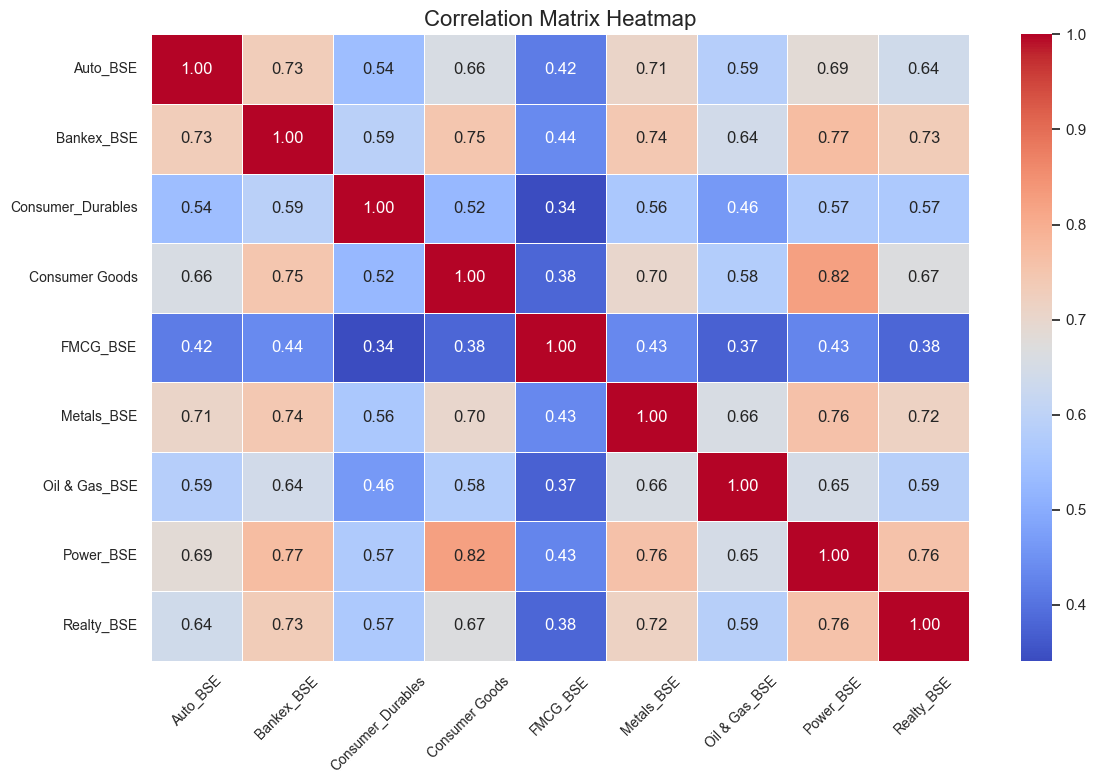

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Load the combined sector data
data = pd.read_csv("combined_closing_prices.csv")  # Replace with your file path
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.set_index('Date', inplace=True)

# Function to perform ADF test and extract results
def adf_test(series):
    result = adfuller(series, autolag='AIC', regression='ct')  # 'ct' adds a trend
    return {
        "T-Statistic (Level)": result[0],
        "P-Value (Level)": result[1],
        "T-Statistic (1st Diff)": None,  # Placeholder for first difference
        "P-Value (1st Diff)": None  # Placeholder for first difference
    }

# Perform ADF test at level form for all sectors
adf_results = {col: adf_test(data[col].dropna()) for col in data.columns}

# Calculate first differences and re-run ADF test
for col in data.columns:
    diff_series = data[col].diff().dropna()
    result_diff = adfuller(diff_series, autolag='AIC', regression='ct')
    adf_results[col]["T-Statistic (1st Diff)"] = result_diff[0]
    adf_results[col]["P-Value (1st Diff)"] = result_diff[1]

# Convert results to a DataFrame
adf_results_df = pd.DataFrame(adf_results).T
adf_results_df.reset_index(inplace=True)
adf_results_df.rename(columns={"index": "Sector"}, inplace=True)

# Display the table using tabulate
table = tabulate(adf_results_df, headers="keys", tablefmt="grid", showindex=False)

# Print the table
print(table)

# Save results to a CSV file
adf_results_df.to_csv("adf_test_results.csv", index=False)


+-------------------+-----------------------+-------------------+--------------------------+----------------------+
| Sector            |   T-Statistic (Level) |   P-Value (Level) |   T-Statistic (1st Diff) |   P-Value (1st Diff) |
+===================+=======================+===================+==========================+======================+
| Auto_BSE          |              -2.717   |          0.22909  |                 -26.5014 |                    0 |
+-------------------+-----------------------+-------------------+--------------------------+----------------------+
| Bankex_BSE        |              -2.07782 |          0.558492 |                 -26.0184 |                    0 |
+-------------------+-----------------------+-------------------+--------------------------+----------------------+
| Consumer_Durables |              -2.66023 |          0.252962 |                 -27.3146 |                    0 |
+-------------------+-----------------------+-------------------+-------

In [38]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from tabulate import tabulate

# Load the data
data = pd.read_csv("combined_closing_prices.csv", parse_dates=["Date"])
data.set_index("Date", inplace=True)

# Perform the Johansen cointegration test
result = coint_johansen(data, det_order=-1, k_ar_diff=1)  # Setting k_ar_diff to 1 for the first lag

# Extract the results for the table
table_data = {
    "Hypothesized No. of CE(s)": [f"At most {i}" if i > 0 else "None *" for i in range(len(result.lr1))],
    "Eigen Value": result.eig,
    "Trace Statistic": result.lr1,
    "Critical Value 0.05": result.cvt[:, 1],
    "Prob.**": [0.05 if stat > crit else 1 - (stat / crit) for stat, crit in zip(result.lr1, result.cvt[:, 1])]
}

# Convert the table data to a DataFrame
table_df = pd.DataFrame(table_data)

# Display the table using tabulate for formatted output
table = tabulate(
    table_df,
    headers="keys",
    tablefmt="grid",
    floatfmt=".5f"
)
print(table)

# Save the table to a CSV
table_df.to_csv("johansen_cointegration_table.csv", index=False)


+----+-----------------------------+---------------+-------------------+-----------------------+-----------+
|    | Hypothesized No. of CE(s)   |   Eigen Value |   Trace Statistic |   Critical Value 0.05 |   Prob.** |
+====+=============================+===============+===================+=======================+===========+
|  0 | None *                      |       0.06034 |         179.10769 |             179.51990 |   0.00230 |
+----+-----------------------------+---------------+-------------------+-----------------------+-----------+
|  1 | At most 1                   |       0.05215 |         126.52106 |             143.66910 |   0.11936 |
+----+-----------------------------+---------------+-------------------+-----------------------+-----------+
|  2 | At most 2                   |       0.03097 |          81.26621 |             111.77970 |   0.27298 |
+----+-----------------------------+---------------+-------------------+-----------------------+-----------+
|  3 | At most 3   

In [52]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from tabulate import tabulate

# Load the combined closing price data (your sector data)
data = pd.read_csv("combined_closing_prices.csv", parse_dates=["Date"])
data.set_index("Date", inplace=True)

# Strip any extra spaces from column names
data.columns = data.columns.str.strip()

# List of sector index pairs for pairwise cointegration
sector_pairs = [
    ('Auto_BSE', 'Bankex_BSE'),
    ('Auto_BSE', 'Consumer Durables'),
    ('Auto_BSE', 'Consumer Goods_BSE'),
    ('Auto_BSE', 'FMCG_BSE'),
    ('Auto_BSE', 'IT_BSE'),
    ('Auto_BSE', 'Metals_BSE'),
    # Add more pairs as needed
]

# Initialize a list to store the results and differences
results = []

# Perform the Johansen cointegration test for each pair
for sector1, sector2 in sector_pairs:
    # Check if both sectors exist in the columns
    if sector1 in data.columns and sector2 in data.columns:
        pair_data = data[[sector1, sector2]].dropna()  # Use only the rows where both series have data
        result = coint_johansen(pair_data, det_order=-1, k_ar_diff=1)  # Johansen test with 1 lag
        
        # Extract the necessary values from the test result
        for i in range(len(result.lr1)):
            # Hypothesis: r <= i (Eigenvalue, Trace Statistic, Critical Value, p-value)
            hypothesis = f"r <= {i}" if i > 0 else "r <= 0"
            eigenvalue = result.eig[i]
            trace_stat = result.lr1[i]
            critical_value = result.cvt[i, 1]  # Critical value for 0.05 significance
            prob_value = 1 - (trace_stat / critical_value) if trace_stat > critical_value else 0.05

            # Find the previous hypothesis (for calculating difference)
            if i > 0:
                prev_eigenvalue = result.eig[i-1]
                prev_trace_stat = result.lr1[i-1]
                prev_critical_value = result.cvt[i-1, 1]
                prev_prob_value = 1 - (prev_trace_stat / prev_critical_value) if prev_trace_stat > prev_critical_value else 0.05
            else:
                prev_eigenvalue, prev_trace_stat, prev_critical_value, prev_prob_value = None, None, None, None
            
            # Calculate differences between this and previous hypothesis (if applicable)
            diff_eigenvalue = eigenvalue - prev_eigenvalue if prev_eigenvalue is not None else None
            diff_trace_stat = trace_stat - prev_trace_stat if prev_trace_stat is not None else None
            diff_critical_value = critical_value - prev_critical_value if prev_critical_value is not None else None
            diff_prob_value = prob_value - prev_prob_value if prev_prob_value is not None else None

            # Append the result for the pair
            results.append([f"{sector1}-{sector2}", hypothesis, eigenvalue, trace_stat, critical_value, prob_value,
                            diff_eigenvalue, diff_trace_stat, diff_critical_value, diff_prob_value])
    else:
        print(f"Warning: '{sector1}' or '{sector2}' not found in columns")

# Create a DataFrame from the results
columns = ['Sector Indices', 'Hypothesis', 'Eigenvalue', 'Trace Statistic', 'Critical Value 0.05', 'Prob.**',
           'Diff. Eigenvalue', 'Diff. Trace Statistic', 'Diff. Critical Value', 'Diff. Prob.**']

df_results = pd.DataFrame(results, columns=columns)

# Display the table using tabulate
table = tabulate(df_results, headers="keys", tablefmt="grid", floatfmt=".5f")
print(table)

# Optionally save the results to a CSV
df_results.to_csv('pairwise_cointegration_with_differences.csv', index=False)


+----+---------------------+--------------+--------------+-------------------+-----------------------+-----------+--------------------+-------------------------+------------------------+-----------------+
|    | Sector Indices      | Hypothesis   |   Eigenvalue |   Trace Statistic |   Critical Value 0.05 |   Prob.** |   Diff. Eigenvalue |   Diff. Trace Statistic |   Diff. Critical Value |   Diff. Prob.** |
+====+=====================+==============+==============+===================+=======================+===========+====================+=========================+========================+=================+
|  0 | Auto_BSE-Bankex_BSE | r <= 0       |      0.00773 |           7.09884 |              12.32120 |   0.05000 |          nan       |               nan       |              nan       |       nan       |
+----+---------------------+--------------+--------------+-------------------+-----------------------+-----------+--------------------+-------------------------+-------------------

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
from tabulate import tabulate

# Load the combined closing price data
data = pd.read_csv("combined_closing_prices.csv", parse_dates=["Date"])
data.set_index("Date", inplace=True)

# Strip any extra spaces from column names (important to prevent mismatch)
data.columns = data.columns.str.strip()

# List of sector index pairs to test for Granger Causality
sector_pairs = [
    ('Auto_BSE', 'Bankex_BSE'),
    ('Auto_BSE', 'Consumer_Durables'),
    ('Auto_BSE', 'FMCG_BSE'),
    ('Auto_BSE', 'IT_BSE'),
    ('Auto_BSE', 'Metals_BSE'),
    ('Auto_BSE', 'Oil & Gas_BSE'),
    ('Auto_BSE', 'Power_BSE'),
    ('Auto_BSE', 'Realty_BSE'),
    ('Bankex_BSE', 'Consumer_Durables'),
    ('Bankex_BSE', 'FMCG_BSE'),
    ('Bankex_BSE', 'IT_BSE'),
    ('Bankex_BSE', 'Metals_BSE'),
    ('Bankex_BSE', 'Oil & Gas_BSE'),
    ('Bankex_BSE', 'Power_BSE'),
    ('Bankex_BSE', 'Realty_BSE'),
    # Add more pairs as needed
]

# Initialize a list to store the results
results = []

# Perform the Granger causality test for each pair
for sector1, sector2 in sector_pairs:
    # Check if both sectors exist in the columns
    if sector1 in data.columns and sector2 in data.columns:
        # Perform Granger causality test
        pair_data = data[[sector1, sector2]].dropna()
        test_result = grangercausalitytests(pair_data, maxlag=5, verbose=False)  # Max lag = 5, can adjust
        
        # Extract F-statistics and p-values for both directions
        f_stat_1 = test_result[1][0]['ssr_ftest'][0]
        p_value_1 = test_result[1][0]['ssr_ftest'][1]
        
        f_stat_2 = test_result[2][0]['ssr_ftest'][0]
        p_value_2 = test_result[2][0]['ssr_ftest'][1]
        
        # Determine if p-value is significant and format the result
        p_value_1_str = f"{p_value_1:.4f}" + ("*" if p_value_1 < 0.05 else "")
        p_value_2_str = f"{p_value_2:.4f}" + ("*" if p_value_2 < 0.05 else "")
        
        # Prepare the result row for the table
        results.append([f"{sector1} does not Granger Cause {sector2}", f"{f_stat_1:.4f}", p_value_1_str])
        results.append([f"{sector2} does not Granger Cause {sector1}", f"{f_stat_2:.4f}", p_value_2_str])
    else:
        print(f"Warning: '{sector1}' or '{sector2}' not found in columns")

# Create a DataFrame from the results
columns = ['Null Hypothesis', 'F-Statistic', 'Prob.']
df_results = pd.DataFrame(results, columns=columns)

# Display the table using tabulate
table = tabulate(df_results, headers="keys", tablefmt="grid", showindex=False)
print(table)

# Optionally save the results to a CSV
df_results.to_csv('granger_causality_table.csv', index=False)


c:\Users\ayush\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\ayush\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\ayush\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


c:\Users\ayush\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\ayush\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\ayush\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\ayush\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\ayush\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\ayush\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWar

+-----------------------------------------------------+---------------+---------+
| Null Hypothesis                                     |   F-Statistic | Prob.   |
+=====================================================+===============+=========+
| Auto_BSE does not Granger Cause Bankex_BSE          |        1.1161 | 0.2911  |
+-----------------------------------------------------+---------------+---------+
| Bankex_BSE does not Granger Cause Auto_BSE          |        1.1332 | 0.3225  |
+-----------------------------------------------------+---------------+---------+
| Auto_BSE does not Granger Cause Consumer_Durables   |        0.3271 | 0.5675  |
+-----------------------------------------------------+---------------+---------+
| Consumer_Durables does not Granger Cause Auto_BSE   |        0.5248 | 0.5919  |
+-----------------------------------------------------+---------------+---------+
| Auto_BSE does not Granger Cause FMCG_BSE            |        4.4753 | 0.0347* |
+---------------

c:\Users\ayush\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\ayush\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
